## 지도학습 분류(Classification)와 라벨 
### VDS 데이터를 이용하여 머신러닝 모델을 적용해본다
### VDS 데이터 라벨을 이용하여 인공신경망을 적용해본다 
- 학습목표: 라벨링에 따른 머신러닝과 딥러닝(인공신경망) 모델의 특성을 이해한다.

## I. 데이터 가져오기 
- 판다스를 이용하여 교통 데이터 가져오기

(6451, 4) (6451,)
(1613, 4) (1613,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 6,659
Trainable params: 6,659
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
51/51 - 2s - loss: 0.6681 - accuracy: 0.7810 - val_loss: 0.4440 - val_accuracy: 0.8369 - 2s/epoch - 36ms/step
Epoch 2/100
51/51 - 0s - los

Epoch 59/100
51/51 - 0s - loss: 0.2516 - accuracy: 0.9022 - val_loss: 0.2847 - val_accuracy: 0.8878 - 473ms/epoch - 9ms/step
Epoch 60/100
51/51 - 0s - loss: 0.2506 - accuracy: 0.9020 - val_loss: 0.2816 - val_accuracy: 0.8946 - 466ms/epoch - 9ms/step
Epoch 61/100
51/51 - 0s - loss: 0.2484 - accuracy: 0.9034 - val_loss: 0.2841 - val_accuracy: 0.8921 - 482ms/epoch - 9ms/step
Epoch 62/100
51/51 - 0s - loss: 0.2505 - accuracy: 0.9030 - val_loss: 0.2850 - val_accuracy: 0.8940 - 437ms/epoch - 9ms/step
Epoch 63/100
51/51 - 0s - loss: 0.2517 - accuracy: 0.9016 - val_loss: 0.2822 - val_accuracy: 0.8909 - 455ms/epoch - 9ms/step
Epoch 64/100
51/51 - 0s - loss: 0.2503 - accuracy: 0.9023 - val_loss: 0.2887 - val_accuracy: 0.8915 - 460ms/epoch - 9ms/step
Epoch 65/100
51/51 - 0s - loss: 0.2487 - accuracy: 0.9016 - val_loss: 0.2932 - val_accuracy: 0.8865 - 460ms/epoch - 9ms/step
Epoch 66/100
51/51 - 0s - loss: 0.2469 - accuracy: 0.9044 - val_loss: 0.2857 - val_accuracy: 0.8915 - 454ms/epoch - 9ms/step


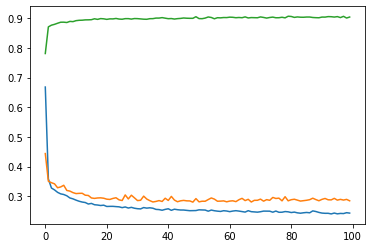

In [1]:
import tensorflow as tf
import pandas as pd
df = pd.read_csv('./daejeon_vds16.csv')
df.head()

def get_score(v):
    if v < 30:
        score = 'Jam'
    elif v < 50:
        score = 'Slow'
    else :
        score = 'Normal'
    return score

df["label_speed"] = df["Speed"].apply(lambda v: get_score(v))

import matplotlib.pyplot as plt
df['label_speed'].unique()
feature_cols = ['ToVol','Occ.Rate','LaVol', 'MeVol']
target_col = 'label_speed'
X = df[feature_cols]
y = df[target_col]

class_dic = {'Jam':0, 'Slow':1, 'Normal':2}
y_ohc = y.apply(lambda z: class_dic[z])
y_ohc.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohc, test_size=0.20, random_state=30)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import numpy as np
## Deep Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Flatten, Dense, Softmax
model = Sequential([ Dense(64, activation='relu',input_shape=[len(X_train[1])]),
                    Dense(64, activation='relu'), Dense(32, activation='relu'),
                    Dense(3, activation='softmax') ])
model.summary()
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test),
                    batch_size=128, verbose=2)
model.evaluate(X_test,y_test)
history.history.keys()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])

# (1) 연습문제 해보기 : 속도
- VDS 데이터의 라벨을 속도(Speed)에 대하여 자신의 라벨을 정의하시오
- 예 (20, 50) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (2) 연습문제 해보기 : 교통량
### 교통량(ToVol) 혹은 SmVol로 라벨을 정하는 방법을 적용하세요
- 예 (100, 300) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (3) 연습문제 해보기
- VDS 데이터의 라벨을 점유률(Occ.Rate)에 대하여 자신의 라벨을 정의하시오
- 예 (8, 16) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (4) 연습문제 해보기
- 머신러닝 방법과 DNN 방법을 비교하여 자장 휼룡한 신경망 방법과 하이퍼파라미터를 설정하세요.